In [1]:
# First we import the module and start up the Matlab interpreter

import os
import numpy as np
from pace_neutrons import Matlab
m = Matlab()


Trying MATLAB version: 2022b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2022b.ctf))
Searching for Matlab 9.13 in /opt/matlab2021b
Searching for Matlab 9.13 in /opt
Trying MATLAB version: 2021b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2021b.ctf))
Searching for Matlab 9.11 in /opt/matlab2021b
Found Matlab 9.11 glnxa64 at /opt/matlab2021b
Interface opened
All features have moved to hor_config


!==================================================================!

!          ISIS utilities for visualization and analysis           !
!                   of neutron spectroscopy data                   !
!                          Herbert 4.0.0                           !
!------------------------------------------------------------------!

All features have moved to hor_config

!==================================================================!

!----------------------------------

We're going to first look at some other different data to illustrate an option of the "projection" which Horace uses to define the cut / plot you get, and then go back to the bcc-Iron dataset.

The dataset we'll use is of a hexagonal system, UPd$_3$.

There is an option called `nonorthogonal` which can be a bit counter-intuitive. The reason for it is that Matlab does not allow you to plot on a non-Cartesian grid (although Matplotlib does so this should be changed eventually!).

Try the code below with both `'nonorthogonal', True` and `'nonorthogonal', False` and think about the difference.

The default in Horace is `'nonorthogonal', False` - why might you want to plot `'nonorthogonal', True`?


*** Step 1 of 1; Read data for  6064712 pixels -- processing data...
 ----->  retained   5028944 pixels

*** Completed cat_pixels using 1 pages in 0.23239 sec.


*** Step 1 of 1; Read data for  6064712 pixels -- processing data...
 ----->  retained   5028944 pixels

*** Completed cat_pixels using 1 pages in 0.20207 sec.



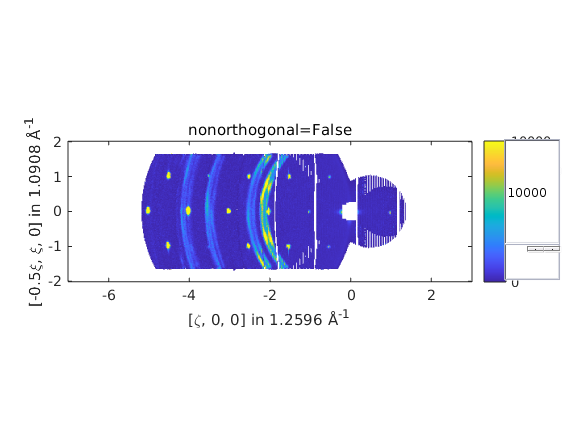

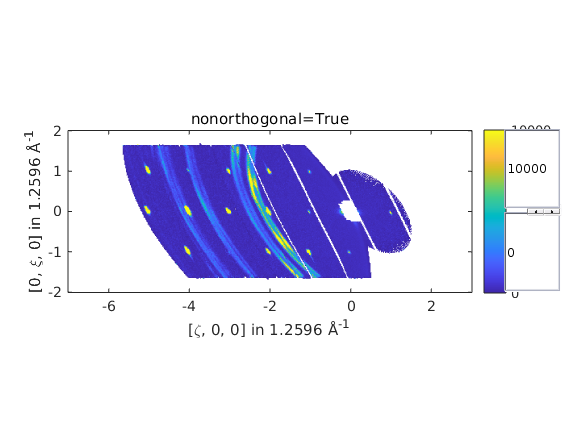

In [2]:
sqw_nonorth = '/mnt/ceph-training/course_materials/sqw_files/upd3_elastic.sqw'

proj = m.line_proj([1,0,0], [0,1,0], 'type', 'rrr', 'nonorthogonal', False)
ws_nonorth_f = m.cut_sqw(sqw_nonorth, proj, [-7,0.02,3], [-2,0.02,2], [-0.1,0.1], [-1,1]);
m.plot(ws_nonorth_f)
m.lz(0,10000)
m.title('nonorthogonal=False')
m.keep_figure()

proj = m.line_proj([1,0,0], [0,1,0], 'type', 'rrr', 'nonorthogonal', True)
ws_nonorth_t = m.cut_sqw(sqw_nonorth, proj, [-7,0.02,3], [-2,0.02,2], [-0.1,0.1], [-1,1]);
m.plot(ws_nonorth_t)
m.lz(0,10000)
m.title('nonorthogonal=True')
m.keep_figure()

----

We're going to look more carefully at the bcc-Iron dataset we saw yesterday. You can either use the file you generated yesterday or use the pre-generated file in the `course_materials` folder.

In this case, we will use a different projection to view the data, which we will use for latter fitting - use `u = [1,1,0]` and `v = [-1, 1, 0]`

Yesterday, we mentioned that there are two types of objects used in Horace - `sqw` and `dnd`. When you run `cut_sqw` you rebin the data into bins you define (with the four numerical variables), but these bins are actually composed of 10's to 100's of individual detector-ToF bin elements in the original raw data, which Horace calls "pixels". An `sqw` object retains this "pixel" information whereas a `dnd` object does not.

By default the output of `cut_sqw` is an `sqw`. If you specify the `-nopix` flag to `cut_sqw` it will create a `dnd` (where `n` is the actual dimension, so the object type will actually be `d1d`, `d2d`, etc). Now if you just want to plot the cut, you don't need the pixel information, so you can add `-nopix` to the `cut_sqw` call to save memory. 

However, if you retain the pixel information, then you can make new cuts _from_ the previous cut (in memory) much faster, because you don't have to load the data again from disk. We will see this in the following. Notice that we add a `tic` and `toc` before and after the `my_cut` call. This will give us the time it takes to make the cut from disk.

*** Step 1 of 1; Read data for  3065394 pixels -- processing data...
 ----->  retained    888442 pixels

*** Completed cat_pixels using 1 pages in 0.038547 sec.

*** Step 1 of 1; Read data for   508448 pixels -- processing data...
 ----->  retained    139698 pixels

*** Completed cat_pixels using 1 pages in 0.010004 sec.

Cut took [[1.772326]] s from disk


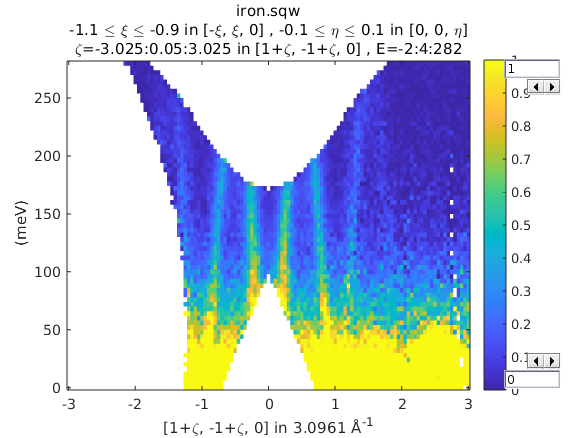

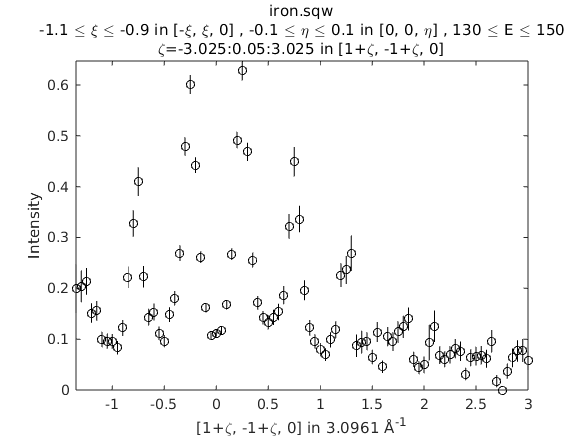

In [3]:
%matlab_plot_mode inline

sqw_file = '/mnt/ceph-training/course_materials/sqw_files/iron.sqw'

u = [1, 1, 0]
v = [-1, 1, 0]
offset = [0, 0, 0, 0]
projtype = 'rrr'
proj = m.line_proj(u, v, 'offset', offset, 'type', projtype)

my_slice = m.cut_sqw(sqw_file, proj, [-3,0.05,3], [-1.1,-0.9], [-0.1,0.1], [0,4,280])
m.plot(my_slice)
m.lz(0, 1)
m.keep_figure()

m.tic()
my_cut = m.cut_sqw(sqw_file, proj, [-3,0.05,3], [-1.1,-0.9], [-0.1,0.1], [130,150])
tcut = m.toc()
print(f'Cut took {tcut} s from disk')
m.plot(my_cut)
m.keep_figure()


*** Step 1 of 1; Read data for   139698 pixels -- processing data...
 ----->  retained    139698 pixels

*** Completed cat_pixels using 1 pages in 0.020818 sec.

Cut took [[1.147787]] s from memory


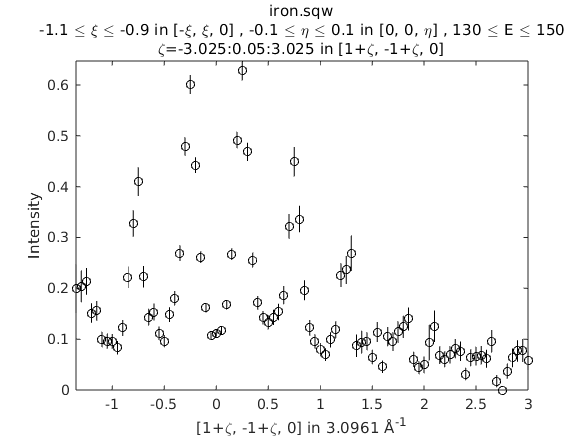

In [4]:
# Now we make the cut again, but from the slice (which is memory)
# Note that because the slice in memory is 2D, we only give two sets of numbers to the
# "cut" command, because the other dimensions have already been integrated over.
# In this case because we integrated over the "v" and "w" directions, we only have the
# "u" and "energy" directions.

m.tic()
my_cut2 = m.cut(my_slice, [-3,0.05,3], [130, 150])
tmem = m.toc()
m.plot(my_cut2)
print(f'Cut took {tmem} s from memory')

You should see that the cut from memory is significantly faster.

In addition to being faster, some Horace functions (especially those related to resolution convolution) require the pixel information in an `sqw` object and will not work with a `dnd` object.

----

We're now going to look at how to correct for slight misalignments of the crystal in an experiment, using the bcc-Iron dataset.

The procedure is as follows:

1. Make a series of reciprocal space maps integrating over the elastic line (in the case of bcc-Iron, with `Ei=400`, a value of `[-5,5]` integrating between -5 and +5 meV is good), along different H, K and L directions/planes to identify the Bragg peaks in the data.
2. Use the function `bragg_positions` to make and then fit transverse and radial cuts of these peaks (the function will make the cuts and do the fit for you but you need to give it the integration ranges along and perpendicular to the Q direction - you can check the [help on it here](https://pace-neutrons.github.io/Horace/unstable/manual/Correcting_for_sample_misalignment.html#bragg-positions). As a good rule of thumb, you want the cut lengths to be a bit less than a single reciprocal lattice vector, the cut width (bin size) to be as small as will give good stats, and the cut thickness to be around a third to a half of a reciprocal lattice vector. Although you can use the `'bin_relative'` keyword to give these values in reciprocal lattice units (which is fine for iron because it is cubic), in general you want to use `'bin_absolute'` so all the cuts are the same thickness, bin size etc.
3. Use the function `bragg_position_view` to look at the cuts and fit and check they are ok - if necessary, go back to the previous step and change the parameters to `bragg_positions`. (E.g. if you see multiple peaks or no peak in your cut or the data is too noisy).
4. Use the function `refine_crystal` to obtain the alignment correction object. Help on [this function is here](https://pace-neutrons.github.io/Horace/unstable/manual/Correcting_for_sample_misalignment.html#step-3-calculate-the-misalignment-correction). If you want to ensure that Horace keeps a cubic structure you need to give the `'fix_angdeg'` (keeps the lattice angles at 90 degrees) and `'fix_alatt_ratio'` (to keep *a=b=c*) keywords.
5. The output of `refine_crystal` can be fed into `change_crystal` which will apply the correction to the `sqw` file itself (note that you cannot change files in the "course_materials" folder so should copy the file to your home folder.
6. Make the same cuts as step 1 and check the Bragg peaks are at their nominal positions.

Instead of steps 5 and 6, you could use the function `crystal_pars_correct` to compute a set of goniometer angles corresponding to the alignment correction object generated by `refine_crystal` and use this in the `gen_sqw` step instead. [Help on this is here](https://pace-neutrons.github.io/Horace/unstable/manual/Correcting_for_sample_misalignment.html#option-2-calculate-goniometer-offsets-for-regeneration-of-sqw-file-s)

*** Step 1 of 1; Read data for   967840 pixels -- processing data...
 ----->  included    580704 pixels

*** Step 1 of 1; Read data for   401904 pixels -- processing data...
 ----->  included    246527 pixels

*** Step 1 of 1; Read data for  1076264 pixels -- processing data...
 ----->  included    593913 pixels



array([], shape=(0, 0), dtype=float64)

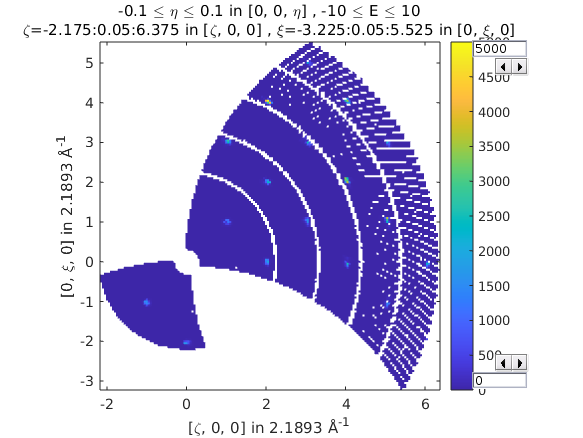

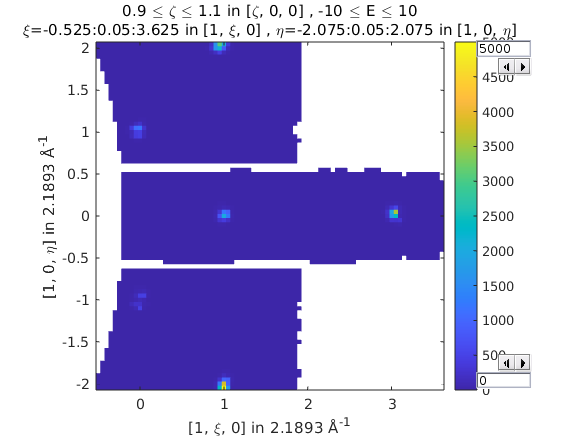

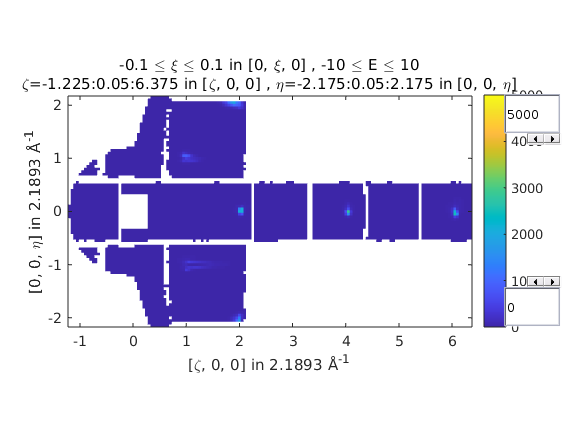

In [5]:
# We'll make a set of reciprocal space maps in the [H-K], [K-L] and [H-L] 
# planes to see what Bragg peaks are in the data.

proj = m.line_proj([1,0,0], [0,1,0], 'type', 'rrr')
HKslice = m.cut_sqw(sqw_file, proj, [-5,0.05,8], [-5,0.05,8], [-0.1,0.1], [-10,10],'-nopix')
m.plot(m.compact(HKslice)); m.lz(0, 5000); m.keep_figure()

KLslice = m.cut_sqw(sqw_file, proj, [0.9,1.1], [-5,0.05,8], [-3,0.05,3], [-10,10],'-nopix')
m.plot(m.compact(KLslice)); m.lz(0, 5000); m.keep_figure()

HLslice = m.cut_sqw(sqw_file, proj, [-5,0.05,8], [-0.1,0.1], [-3,0.05,3], [-10,10],'-nopix')
m.plot(m.compact(HLslice)); m.lz(0, 5000); m.keep_figure()

--------------------------------------------------------------------------------

Peak 1:  [4  0  0]    scan: 1 (radial scan)

*** Step 1 of 1; Read data for     3314 pixels -- processing data...
 ----->  included      1290 pixels

Peak 1:  [4  0  0]    scan: 2 (transverse scan)

*** Step 1 of 1; Read data for     7676 pixels -- processing data...
 ----->  included      1342 pixels

Peak 1:  [4  0  0]    scan: 3 (transverse scan)

*** Step 1 of 1; Read data for     3796 pixels -- processing data...
 ----->  included      1434 pixels

--------------------------------------------------------------------------------

Peak 2:  [2  0  0]    scan: 1 (radial scan)

*** Step 1 of 1; Read data for     6524 pixels -- processing data...
 ----->  included      2224 pixels

Peak 2:  [2  0  0]    scan: 2 (transverse scan)

*** Step 1 of 1; Read data for    15672 pixels -- processing data...
 ----->  included      2580 pixels

Peak 2:  [2  0  0]    scan: 3 (transverse scan)

*** Step 1 of 1; Read dat

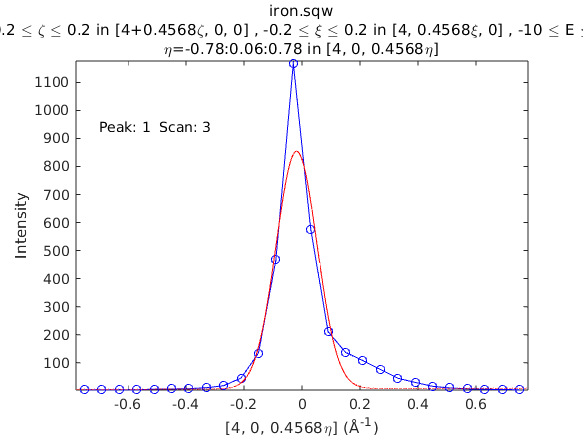

In [6]:
# There's a bug in Horace where the parallelisation code gives an error for this function
# So we turn it off below.
m.hpc('off') 

# From the above data, pick a list of Bragg peaks to fit using `bragg_positions`
# This list is given as an Nx3 array
bragg_peaks = [[4,0,0], [2,0,0], [1,1,0], [4,4,0], [1,0,1]]

rlu0, width, wcut, wpeak = m.bragg_positions(sqw_file, bragg_peaks, 1.5, 0.06, 0.4,
                                             1.5, 0.06, 0.4, 20, 'gauss', 'bin_absolute')

# Now use plot the fitted peaks:
m.bragg_positions_view(wcut,wpeak)

In [7]:
# Determine corrections to lattice and orientation (in this example we choose
# to keep the lattice angles fixed, but allow the lattice parameters to be
# refined, keeping a cubic structure by keeping ratios of lattice pars to be same):

alatt = [2.87, 2.87, 2.87]    # original lattice parameters
angdeg = [90, 90, 90]
rlu_corr = m.refine_crystal(rlu0, alatt, angdeg, bragg_peaks, 'fix_angdeg', 'fix_alatt_ratio')
print(rlu_corr)

  crystal_alignment_info with properties:

       alatt: [2.8468 2.8468 2.8468]
      angdeg: [90 90 90]
      rotmat: [3x3 double]
    distance: [0.0207 0.0045 0.0146 0.0147 0.0123]
      rotvec: [0.0170 4.4858e-04 -0.0052]
    rotangle: 1.0169
    hkl_mode: 0




In [8]:
# Either apply the correction to the sqw file:
# m.change_crystal(sqw_file, rlu_corr)

# Or compute the goniometer angles:
u = [1, 0, 0]  # Original orientation of the crystal, u||ki when psi=0
v = [0, 1, 0]  # Original orientation of the crystal
alatt_new, angdeg_new, dpsi, gl, gs = m.crystal_pars_correct(u, v, alatt, angdeg, 0, 0, 0, 0, rlu_corr)
print(alatt_new)
print(angdeg_new)
print(f'dpsi={dpsi}, gl={gl}, gs={gs}')

[[2.84684834 2.84684834 2.84684834]]
[[90. 90. 90.]]
dpsi=[[-0.29969894]], gl=[[0.02824248]], gs=[[0.97128947]]


----

The following section illustrates some advanced plotting features - the code all works and hopefully is well commented - just read it and see if you understand what it is doing.

spaghetti_plot: rlp found to lie in the plane perpendicular to (-7.04121e-16 -2.68107e-16 -4.37853)

*** Step 1 of 1; Read data for  1699034 pixels -- processing data...
 ----->  retained    572765 pixels

*** Completed cat_pixels using 1 pages in 0.025744 sec.

*** Step 1 of 1; Read data for  3527588 pixels -- processing data...
 ----->  retained   1324612 pixels

*** Completed cat_pixels using 1 pages in 0.052911 sec.

*** Step 1 of 1; Read data for  1276171 pixels -- processing data...
 ----->  retained    461843 pixels

*** Completed cat_pixels using 1 pages in 0.019679 sec.



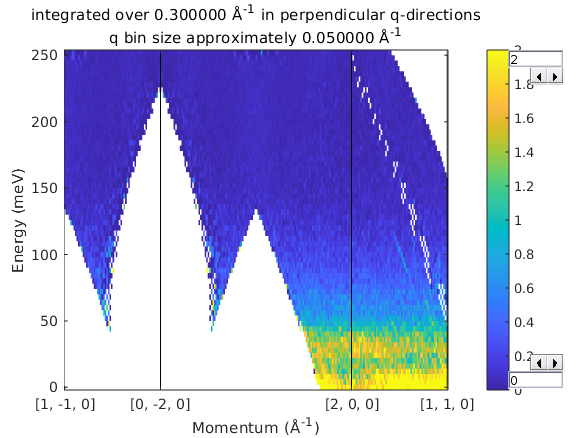

In [9]:
# ========================================================================
#             Advanced plotting and publication quality figures
# ========================================================================
# ========================================================================
#                            "Spaghetti" plot
# =========================================================================
sqw_file = '/mnt/ceph-training/course_materials/sqw_files/iron.sqw'

rlp = [[1,-1,0], [0,-2,0], [2,0,0], [1,1,0]]
m.spaghetti_plot(rlp, sqw_file, 'qbin', 0.05, 'qwidth', 0.3, 'ebin', [0,4,250])
m.lz(0, 2)

*** Step 1 of 1; Read data for  3065394 pixels -- processing data...
 ----->  included    888442 pixels



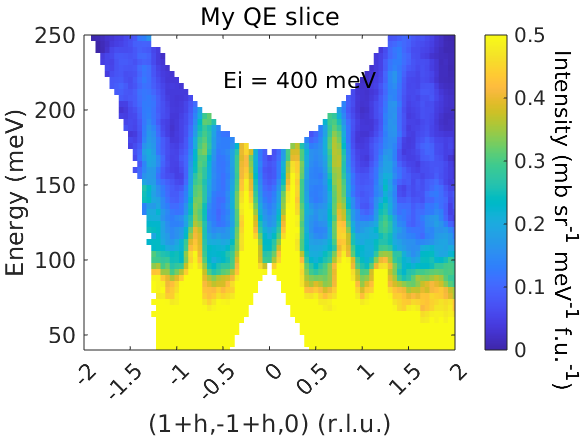

In [10]:
# =========================================================================
#                          Two dimensional plot
# =========================================================================

# Recreate the Q-E slice from earlier, this time without saving the pixel
# information
proj = m.line_proj([1,1,0], [-1,1,0], 'type', 'rrr')

my_slice = m.cut_sqw(sqw_file, proj, [-3,0.05,3], [-1.1,-0.9], [-0.1,0.1], [0,4,280], '-nopix')

# Plot the 2d slice first:
m.plot(m.smooth(m.compact(my_slice)))

# Set limits
m.lx(-2, 2)
m.ly(40, 250)
m.lz(0, 0.5)

# Make a nicer title
m.title('My QE slice')

# Label the axes with something nicer
m.xlabel('(1+h,-1+h,0) (r.l.u.)')
m.ylabel('Energy (meV)')

# Get rid of the colour slider
m.colorslider('delete')
m.colorbar()

# If we want to set the font sizes to be bigger, then we have to re-do the
# above:
m.title('My QE slice', 'FontSize', 16)
m.xlabel('(1+h,-1+h,0) (r.l.u.)', 'FontSize', 16)
m.ylabel('Energy (meV)', 'FontSize', 16)

# To set the font size of the ticks, we need to access the figure's axes.
my_handles = m.gca()
# there are many things you can adjust! To set the font size, or any of the
# other properties, do the following:
m.set(my_handles, 'FontSize', 16)

# Suppose we want to change what tick marks are used on the x-axis
num2str = m.eval('@num2str')
m.set(my_handles, 'XTick', np.arange(-2, 2.1, 0.5))
m.set(my_handles, 'XTickLabel', m.arrayfun(num2str, np.arange(-2, 2.1, 0.5), 'UniformOutput', False))

# Put some text on the figure:
m.text(-0.5, 220, 'Ei = 400 meV', 'FontSize', 16)

# Some fancier text to label the colour bar:
tt = m.text(3.2, 240, 'Intensity (mb sr^{-1} meV^{-1} f.u.^{-1})', 'FontSize', 16)
m.set(tt, 'Rotation', -90)

In [ ]:
# =========================================================================
#                          One dimensional plots
# =========================================================================

%matlab_plot_mode windowed

# Make an array of 1d cuts:
energy_range = range(80, 161, 20)
# We first have to create an empty container of the correct size
# In Matlab we can do: `my_cuts(1) = cut_sqw(...` to assign an array of objects
# but Python needs to define the variable `my_cuts` first.
my_cuts = m.sqw.empty()
# Note that in the following, although we are using a Matlab container,
# because we are in Python we use Python (0-based) indexing, not Matlab (1-based).
for i, en in enumerate(energy_range):
    my_cuts[i] = m.cut_sqw(sqw_file, proj, [-3,0.05,3], [-1.1,-0.9], [-0.1,0.1], [-10+en, 10+en])

# plot them individually, to see what they look like first
for i in range(len(energy_range)):
    m.plot(my_cuts[i])
    m.keep_figure()

*** Step 1 of 1; Read data for   200028 pixels -- processing data...
 ----->  retained     53790 pixels

*** Completed cat_pixels using 1 pages in 0.004474 sec.

*** Step 1 of 1; Read data for   284020 pixels -- processing data...
 ----->  retained     70892 pixels

*** Completed cat_pixels using 1 pages in 0.003432 sec.

*** Step 1 of 1; Read data for   458454 pixels -- processing data...
 ----->  retained     98358 pixels

*** Completed cat_pixels using 1 pages in 0.004682 sec.

*** Step 1 of 1; Read data for   508448 pixels -- processing data...
 ----->  retained    139698 pixels

*** Completed cat_pixels using 1 pages in 0.006433 sec.

*** Step 1 of 1; Read data for   467166 pixels -- processing data...
 ----->  retained    148412 pixels

*** Completed cat_pixels using 1 pages in 0.00711 sec.



In [ ]:
%matlab_plot_mode inline

# We want to plot them all on the same axes, with different colours and
# markers.
my_col = ['black', 'red', 'blue', 'green', 'yellow']
my_mark = ['+', 'o', '*', '.', 'x', 's', 'd', '^', 'v', '>', '<', 'p', 'h']
# note the above are all the possible choices!

for i in range(len(my_cuts)):
    m.acolor(my_col[i])
    m.amark(my_mark[i])
    if i == 1:
        m.plot(my_cuts[i])
    else:
        # The pp command overplots (markers and errorbars) on existing 1d axes
        m.pp(my_cuts[i])

In [ ]:
# This is a bit messy. Let's add a constant offset between each cut, and make
# the markers bigger
my_offset = np.arange(0, 1.3, 0.3)
for i in range(len(my_cuts)):
    m.acolor(my_col[i])
    m.amark(my_mark[i], 6)
    if i == 1:
        m.plot(my_cuts[i] + my_offset[i])
    else:
        m.pp(my_cuts[i] + my_offset[i])

In [ ]:
# But we could have done this much more cleanly using the vectorised capabilities
# of Horace functions
m.acolor(['black', 'red', 'blue', 'green', 'yellow'])
m.amark(['+', 'o', '*', '.', 'x', 's'], 6)
my_cut_offset = my_cuts + np.arange(0, 1.3, 0.3)
m.dp(my_cut_offset)
# Note that the above only works because we created a Matlab container.
# If we had used a Python list all the code up to here would work but the
# last two lines above would not, because the Matlab `plus` operator
# and the `dp` function does not understand Python lists.

# Now need to extend axes to see everything:
m.lx(-2, 2)
m.ly(0, 1.8)

# Use the same settings as before to get nice font sizes
m.title('Q cuts', 'FontSize', 16)
m.xlabel('(1+h,-1+h,0) (r.l.u.)', 'FontSize', 16)
m.ylabel('Intensity (mb sr^{-1} meV ^{-1} f.u.^{-1})', 'FontSize', 16)
m.set(m.gca(), 'FontSize', 16)
m.set(m.gca(), 'XTick', np.arange(-2, 2.1, 0.5))
m.set(m.gca(), 'XTickLabel', m.arrayfun(num2str, np.arange(-2, 2.1, 0.5), 'UniformOutput', False))

# Insert a figure legend
m.legend('80 meV', '100 meV', '120 meV', '140 meV', '160 meV')

# Reset the plot color to black
m.acolor('k')